In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

from os import path
import os
from matplotlib import pyplot as plt
import numpy as np
import h5py
from PIL import Image
import re
import sys
from glob import glob

import cv2
from skimage.transform import resize

In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
def change_dir(file: str, index: int):
  f = h5py.File(file, 'r')
  cjdata = f['cjdata']
  label = cjdata.get('label')[0,0]
  if(label==1):
        shutil.copy2('C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/' + str(index) + '.png',
                    'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/1/' + str(index) + '.png')
  if(label==2):
        shutil.copy2('C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/' + str(index) + '.png',
                    'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/2/' + str(index) + '.png')
  if(label==3):
        shutil.copy2('C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/' + str(index) + '.png',
                    'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/3/' + str(index) + '.png')  
        
for a in range(1, 3065):
  filePathToImg = 'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/dataset/' + str(a) + '.mat'
  change_dir(filePathToImg, a)

In [ ]:
# Organize data into train, valid, test dirs
os.chdir('C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/')
if os.path.isdir('train/1/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(1, 4):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [3]:
train_path = 'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/train'
valid_path = 'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/valid'
test_path = 'C:/Users/Rasula/Documents/Projects/BrainTumorClassifier/images/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 2959 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [5]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [6]:
x = mobile.layers[-6].output
output = Dense(units=3, activation='softmax')(x)

In [7]:
model = Model(inputs=mobile.input, outputs=output)

In [8]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [9]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
296/296 - 62s - loss: 0.3244 - accuracy: 0.8729 - val_loss: 0.4089 - val_accuracy: 0.8444
Epoch 2/30
296/296 - 62s - loss: 0.1282 - accuracy: 0.9540 - val_loss: 0.1556 - val_accuracy: 0.9444
Epoch 3/30
296/296 - 61s - loss: 0.0730 - accuracy: 0.9790 - val_loss: 0.4083 - val_accuracy: 0.8444
Epoch 4/30
296/296 - 60s - loss: 0.0492 - accuracy: 0.9861 - val_loss: 0.1303 - val_accuracy: 0.9333
Epoch 5/30
296/296 - 61s - loss: 0.0344 - accuracy: 0.9916 - val_loss: 0.1183 - val_accuracy: 0.9444
Epoch 6/30
296/296 - 64s - loss: 0.0327 - accuracy: 0.9905 - val_loss: 0.1767 - val_accuracy: 0.9222
Epoch 7/30
296/296 - 63s - loss: 0.0187 - accuracy: 0.9959 - val_loss: 0.1393 - val_accuracy: 0.9444
Epoch 8/30
296/296 - 60s - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.1718 - val_accuracy: 0.9556
Epoch 9/30
296/296 - 60s - loss: 0.0222 - accuracy: 0.9943 - val_loss: 0.2318 - val_accuracy: 0.9444
Epoch 10/30
296/296 - 65s - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.2968 - val_accura

In [11]:
history = model.history.history

In [12]:
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [13]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

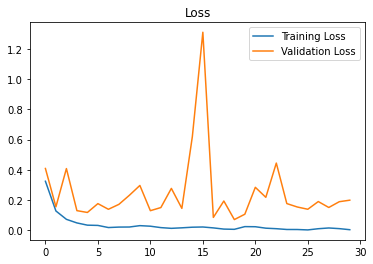

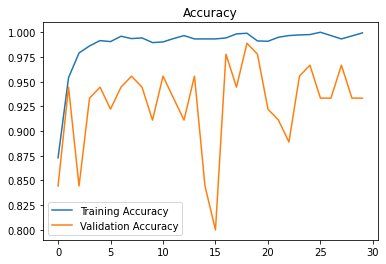

In [14]:
plot_metrics(history)

In [15]:
test_labels = test_batches.classes

In [16]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [17]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [19]:
test_batches.class_indices

{'1': 0, '2': 1, '3': 2}

Confusion matrix, without normalization
[[5 0 0]
 [1 4 0]
 [0 0 5]]


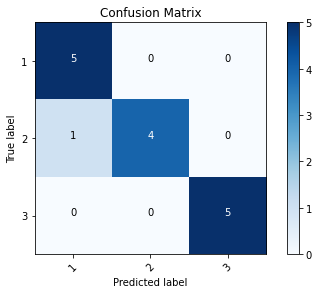

In [20]:
cm_plot_labels = ['1','2','3']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [21]:
model.save('C:/Users/Rasula/Documents/Projects/deepLizardModel/models/mobileNetV2_2_model.h5')

In [28]:
ex_img = cv2.imread('yes.jpg')
resized_image = resize(ex_img, (224,224,3))
predictions = model.predict(np.array([resized_image]))
print(predictions)
np.round(predictions)

[[1.5659355e-06 2.6041977e-03 9.9739420e-01]]


array([[0., 0., 1.]], dtype=float32)

In [29]:
ex_img = cv2.imread('meningioma.jpg')
resized_image = resize(ex_img, (224,224,3))
predictions = model.predict(np.array([resized_image]))
print(predictions)
np.round(predictions)

[[0.0271957  0.16205071 0.8107536 ]]


array([[0., 0., 1.]], dtype=float32)

In [30]:
ex_img = cv2.imread('glioma.jpg')
resized_image = resize(ex_img, (224,224,3))
predictions = model.predict(np.array([resized_image]))
print(predictions)
np.round(predictions)

[[6.0046859e-06 9.5211522e-04 9.9904186e-01]]


array([[0., 0., 1.]], dtype=float32)